In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances

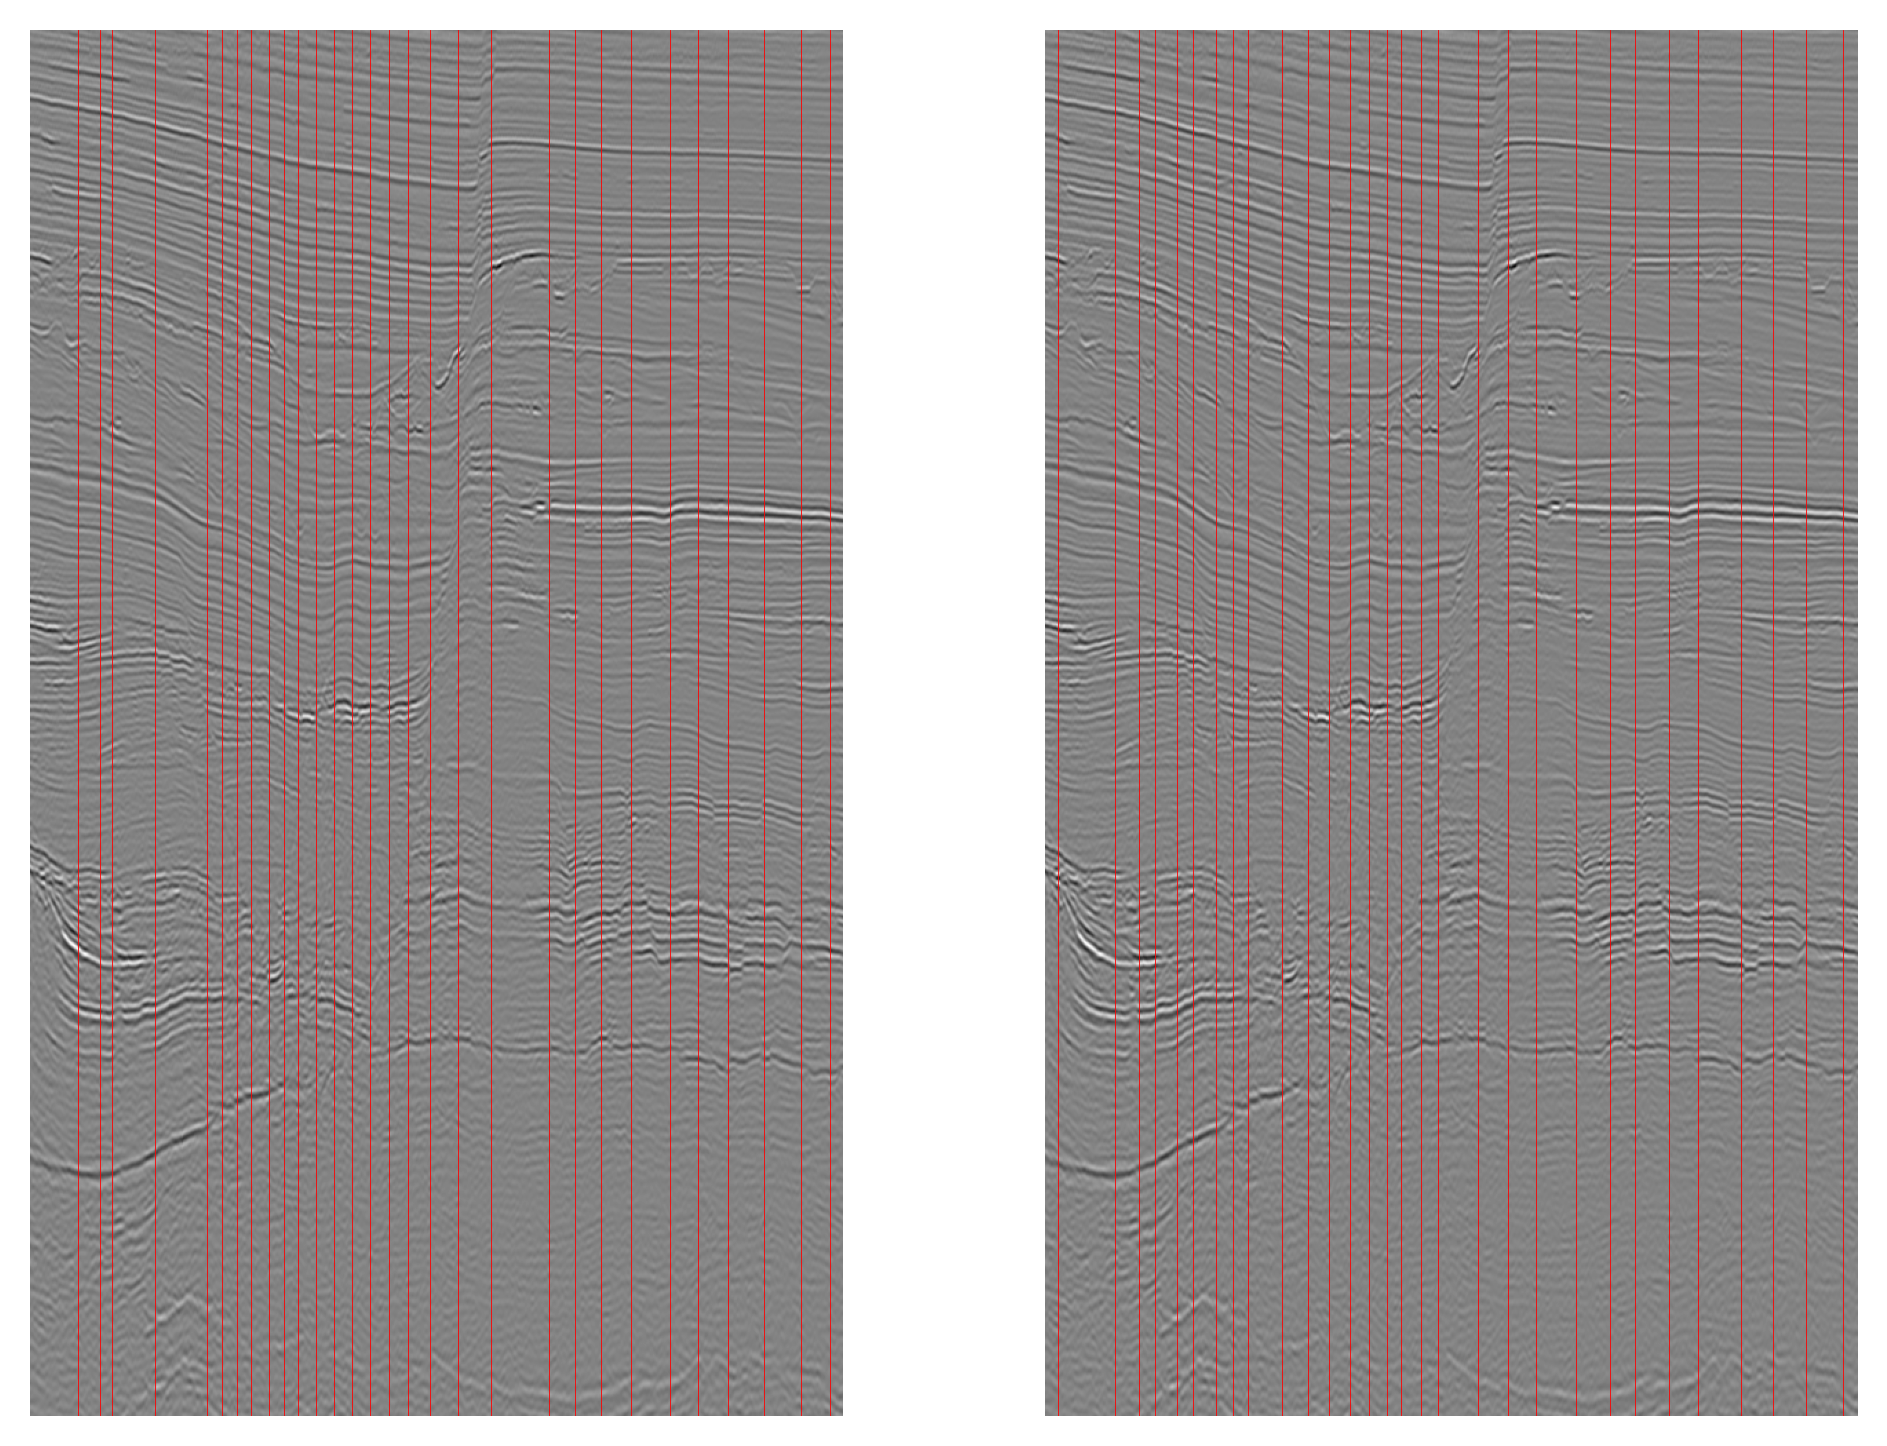

In [3]:
data_file = '/pgeoprj/godeep/ewac_2/seismic_patterns/datasets/public_real_data/parihaka_dataset.npy'

data = np.load(data_file, mmap_mode='r')
section = data[:, 0, :].T

train_sequential = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] 
val_sequential = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59] 

train_random = [490, 570, 148, 153, 187, 200, 230, 83, 585, 411, 443, 469, 59, 463, 377, 383, 485, 302, 416, 536, 240, 531, 315, 285, 303, 172, 178, 265, 354, 307] 
val_random = [426, 559, 406, 12, 92, 458, 100, 184, 21, 118, 314, 543, 513, 483, 88, 427, 404, 506, 477, 218, 449, 319, 140, 201, 400, 247, 254, 537, 261, 316] 

train_equally = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580] 
val_equally = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570] 

train_kmeans = [9, 51, 68, 80, 96, 107, 124, 136, 147, 172, 191, 206, 221, 235, 248, 258, 273, 285, 314, 336, 356, 385, 410, 428, 453, 474, 505, 528, 552, 579] 
val_kmeans = [30, 59, 74, 88, 101, 115, 130, 141, 159, 181, 198, 213, 228, 241, 253, 265, 279, 299, 325, 346, 370, 397, 419, 440, 463, 489, 516, 540, 565]

train_spectral_clustering = [34, 50, 59, 90, 128, 139, 150, 160, 173, 184, 194, 207, 220, 233, 246, 260, 274, 290, 310, 334, 376, 395, 414, 436, 464, 484, 506, 532, 559, 580]
val_spectral_clustering = [42, 54, 74, 109, 133, 144, 155, 166, 178, 189, 200, 213, 226, 239, 253, 267, 282, 300, 322, 355, 385, 404, 425, 450, 474, 495, 519, 545, 569]

plt.figure(figsize=(8,6), dpi=300) 

plt.subplot(1,2,1)
plt.imshow(section, cmap='gray')
plt.axis("off")

for i in train_spectral_clustering:
    plt.axvline(x=i, color='r', lw=0.2)

plt.subplot(1,2,2)
plt.imshow(section, cmap='gray')
plt.axis("off")

for i in train_kmeans:
    plt.axvline(x=i, color='r', lw=0.2)

#plt.tight_layout()
plt.show()

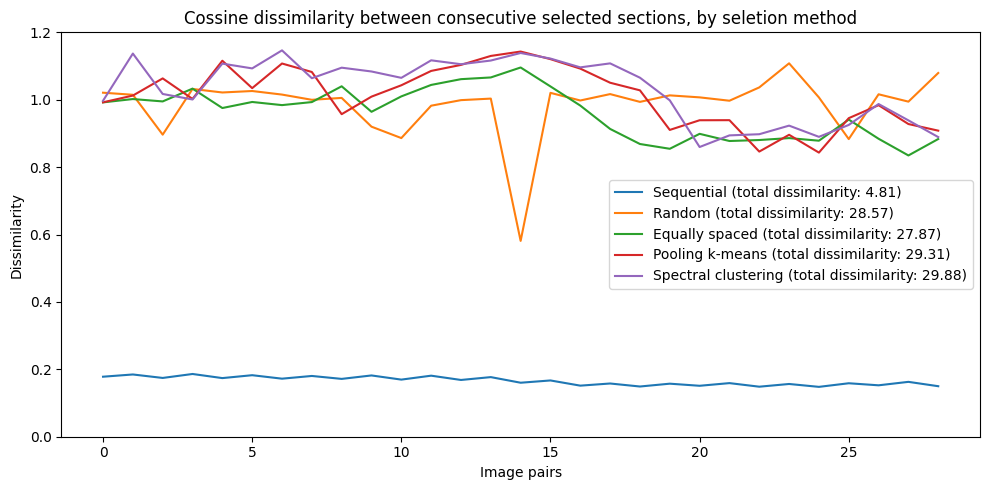

In [30]:

all_train_lists = [train_sequential, train_random, train_equally, train_kmeans, train_spectral_clustering]
sampling_names = ['Sequential', 'Random', 'Equally Spaced', 'Pooling k-means', 'Spectral Clustering']

plt.figure(figsize=(10, 5))

for i, train_list in enumerate(all_train_lists):
    train_data = data[train_list, :, :]
    train_data = train_data.reshape(train_data.shape[0], -1)
    
    # mesma estrutura, mas agora usando cosine_distances
    cosine_dissimilarities = []
    for j in range(len(train_data) - 1):
        vec1 = train_data[j].reshape(1, -1)
        vec2 = train_data[j + 1].reshape(1, -1)
    
        dist = cosine_distances(vec1, vec2)[0][0]  # varia entre 0 e 1
        cosine_dissimilarities.append(dist)
    
    # 4. Plotar resultado
    label_text = f'{sampling_names[i].capitalize()} (total dissimilarity: {round(sum(cosine_dissimilarities), 2)})'
    plt.plot(cosine_dissimilarities, label=label_text)
    
plt.xlabel("Image pairs")
plt.ylabel("Dissimilarity")
plt.title("Cossine dissimilarity between consecutive selected sections, by seletion method")
#plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1.2)
plt.show()